# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

> 🔑 **Note**: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-12-26 12:00:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.67.27, 172.217.167.123, 142.250.204.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.67.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  13.0MB/s    in 8.8s    

2024-12-26 12:00:59 (11.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # Randomly sample 1 from the item of target_folder 
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['899959.jpg']
Image shape: (384, 512, 3)


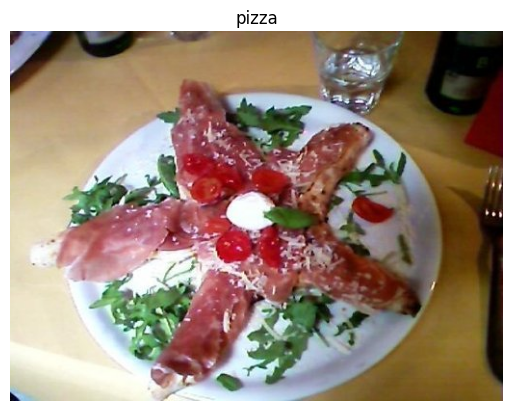

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

2024-12-27 09:27:10.796527: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-27 09:27:10.796552: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-27 09:27:10.796557: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-27 09:27:10.796735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-27 09:27:10.796754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 78,  64,  63],
        [ 72,  58,  57],
        [ 60,  46,  46],
        ...,
        [ 24,  19,  13],
        [ 23,  15,  12],
        [ 20,  12,   9]],

       [[ 78,  64,  63],
        [ 74,  60,  59],
        [ 65,  51,  51],
        ...,
        [ 26,  21,  15],
        [ 24,  16,  13],
        [ 22,  14,  11]],

       [[ 72,  56,  57],
        [ 70,  54,  55],
        [ 65,  49,  52],
        ...,
        [ 29,  22,  14],
        [ 26,  19,  13],
        [ 24,  17,  11]],

       ...,

       [[  9,   7,  18],
        [  6,   6,  18],
        [  5,   6,  26],
        ...,
        [117,  93,  49],
        [116,  89,  62],
        [115,  86,  68]],

       [[ 20,  20,  28],
        [  8,  10,  22],
        [  9,  10,  30],
        ...,
        [119,  92,  47],
        [118,  88,  60],
        [117,  86,  66]],

       [[  0,   1,   8],
        [  6,   8,  20],
        [ 18,  19,  37],
        ...,
        [119,  92,  4

In [11]:
# View the image shape
img.shape # returns width, height, color channels

(384, 512, 3)

> 🔑 **Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [12]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.30588235, 0.25098039, 0.24705882],
        [0.28235294, 0.22745098, 0.22352941],
        [0.23529412, 0.18039216, 0.18039216],
        ...,
        [0.09411765, 0.0745098 , 0.05098039],
        [0.09019608, 0.05882353, 0.04705882],
        [0.07843137, 0.04705882, 0.03529412]],

       [[0.30588235, 0.25098039, 0.24705882],
        [0.29019608, 0.23529412, 0.23137255],
        [0.25490196, 0.2       , 0.2       ],
        ...,
        [0.10196078, 0.08235294, 0.05882353],
        [0.09411765, 0.0627451 , 0.05098039],
        [0.08627451, 0.05490196, 0.04313725]],

       [[0.28235294, 0.21960784, 0.22352941],
        [0.2745098 , 0.21176471, 0.21568627],
        [0.25490196, 0.19215686, 0.20392157],
        ...,
        [0.11372549, 0.08627451, 0.05490196],
        [0.10196078, 0.0745098 , 0.05098039],
        [0.09411765, 0.06666667, 0.04313725]],

       ...,

       [[0.03529412, 0.02745098, 0.07058824],
        [0.02352941, 0.02352941, 0.07058824],
        [0.01960784, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
# flow_from_directory -> Create data and labels automatically for us

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data), # We need to do 47 steps per epoch
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-27 09:27:11.894583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6792 - loss: 0.6040 - val_accuracy: 0.7720 - val_loss: 0.4485
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.7885 - loss: 0.4746 - val_accuracy: 0.8460 - val_loss: 0.3815
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8134 - loss: 0.4315 - val_accuracy: 0.8480 - val_loss: 0.3568
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8443 - loss: 0.3872 - val_accuracy: 0.8400 - val_loss: 0.3559
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8474 - loss: 0.3732 - val_accuracy: 0.8520 - val_loss: 0.3607


In [14]:
len(train_data)

47

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground.

In [16]:
train_data

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4995 - loss: 257.4736 - val_accuracy: 0.5000 - val_loss: 461.5682
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5050 - loss: 432.6525 - val_accuracy: 0.5000 - val_loss: 416.5197
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5211 - loss: 381.3066 - val_accuracy: 0.5000 - val_loss: 366.7930
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5027 - loss: 346.8899 - val_accuracy: 0.5000 - val_loss: 319.0288
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4757 - loss: 323.5274 - val_accuracy: 0.5000 - val_loss: 271.4896


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5160 - loss: 58.3937 - val_accuracy: 0.6920 - val_loss: 3.5565
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6483 - loss: 6.8994 - val_accuracy: 0.5680 - val_loss: 9.5538
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6670 - loss: 7.5590 - val_accuracy: 0.7580 - val_loss: 3.2963
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7282 - loss: 3.9765 - val_accuracy: 0.7460 - val_loss: 3.2532
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7273 - loss: 4.9350 - val_accuracy: 0.6340 - val_loss: 8.0742


# Get a summary of model_3

In [20]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

> 🔑 **Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3116018.jpg']
Image shape: (384, 512, 3)
['1138936.jpg']
Image shape: (512, 512, 3)


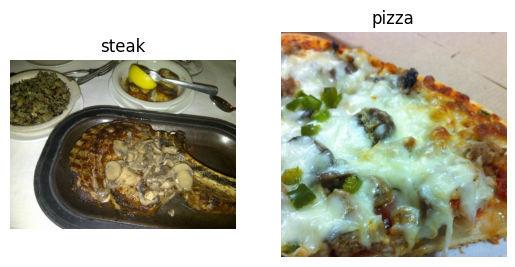

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # rescale parameter -> When you load images divide all of the pixel values by 255
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = next(iter(train_data))  # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there
len(train_data)

47

In [28]:
1500 / 32

46.875

In [29]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [30]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # If "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (Specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Get a summary of our model
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.6199 - loss: 1.4206 - val_accuracy: 0.7760 - val_loss: 0.4532
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8193 - loss: 0.4231 - val_accuracy: 0.8320 - val_loss: 0.3824
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8723 - loss: 0.3376 - val_accuracy: 0.8220 - val_loss: 0.3796
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9603 - loss: 0.1508 - val_accuracy: 0.8080 - val_loss: 0.4550
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9941 - loss: 0.0504 - val_accuracy: 0.8200 - val_loss: 0.5710


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

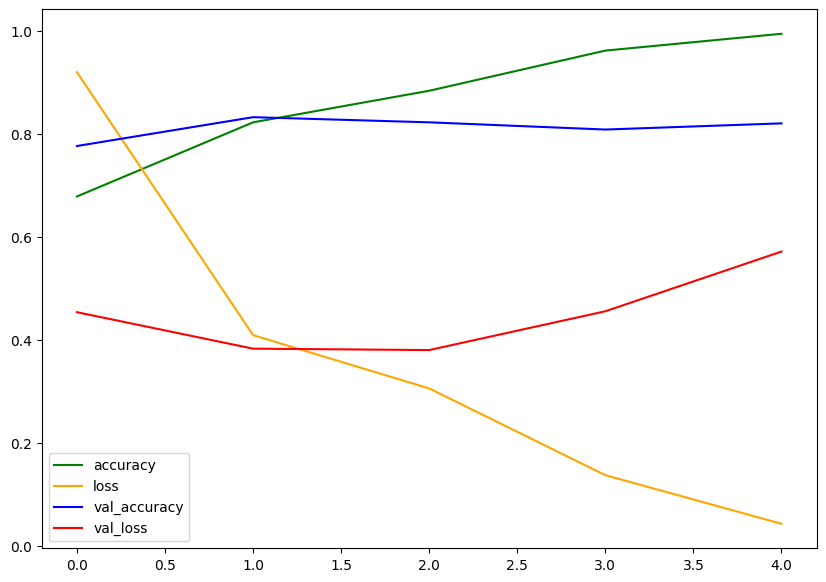

In [39]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7), color=['green', 'orange', 'blue', 'red']);

In [40]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished.

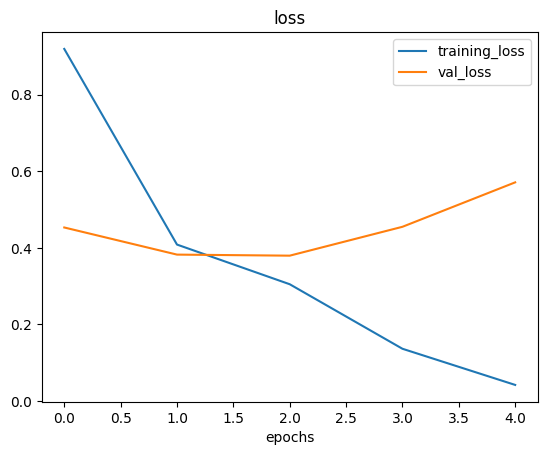

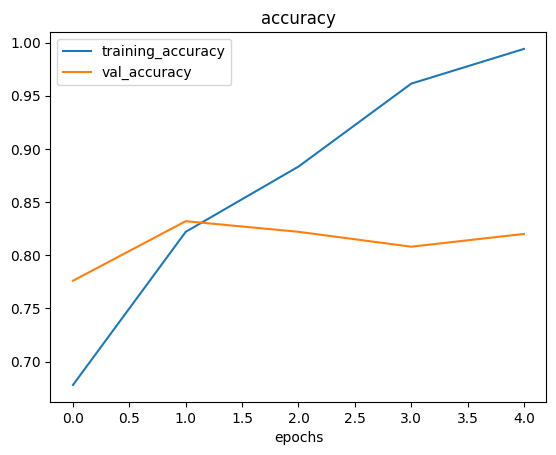

In [41]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history=history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as regularization.

In [42]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")  
])

/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [46]:
# Fit the model
history_5 = model_5.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8257 - loss: 0.3847 - val_accuracy: 0.8520 - val_loss: 0.3319
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8405 - loss: 0.3586 - val_accuracy: 0.8620 - val_loss: 0.3165
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8685 - loss: 0.3058 - val_accuracy: 0.8640 - val_loss: 0.3198
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8788 - loss: 0.3095 - val_accuracy: 0.8600 - val_loss: 0.3119
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8603 - loss: 0.3209 - val_accuracy: 0.8760 - val_loss: 0.3024


In [47]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

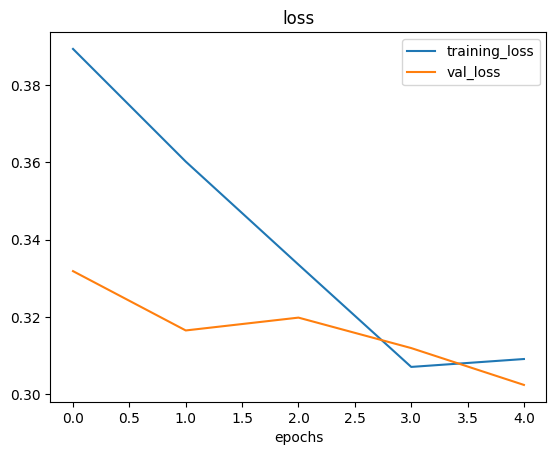

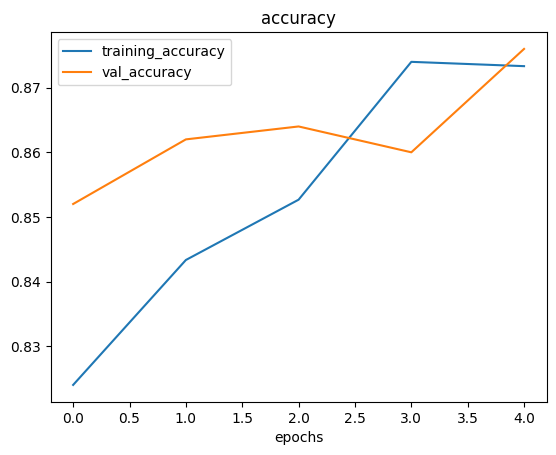

In [48]:
# Plot loss curves
plot_loss_curves(history=history_5)

### Opening our bag of tricks and finding data augmentation

In [51]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.3,
                                              horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.


Let's write some code to visualize data augmentation...

In [52]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [54]:
# Get sample data batches
images, labels = next(iter(train_data))
augmented_images, augmented_labels = next(iter(train_data_augmented)) # note: labels aren't augmented... only data (images)

showing image number: 24


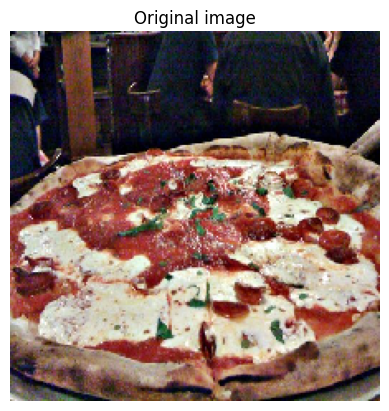

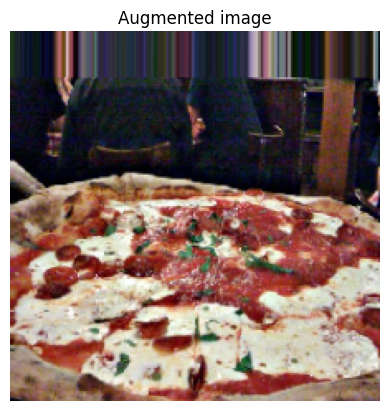

In [63]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [64]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.4955 - loss: 0.7598 - val_accuracy: 0.5020 - val_loss: 0.6866
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.5737 - loss: 0.6865 - val_accuracy: 0.7680 - val_loss: 0.6716
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.5658 - loss: 0.6868 - val_accuracy: 0.6260 - val_loss: 0.6162
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.5953 - loss: 0.6695 - val_accuracy: 0.5540 - val_loss: 0.6543
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.6397 - loss: 0.6488 - val_accuracy: 0.7620 - val_loss: 0.5505


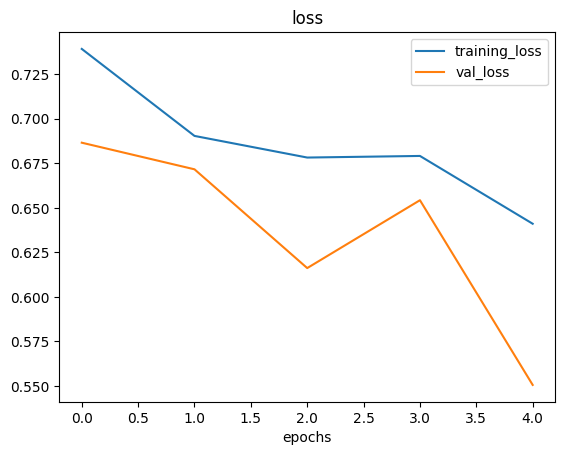

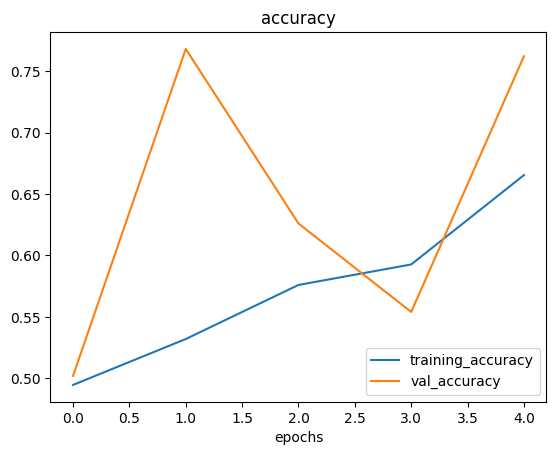

In [65]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [66]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [67]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.5247 - loss: 0.6912 - val_accuracy: 0.6820 - val_loss: 0.5933
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.6749 - loss: 0.6091 - val_accuracy: 0.8240 - val_loss: 0.4181
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.7509 - loss: 0.5076 - val_accuracy: 0.8240 - val_loss: 0.3976
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7613 - loss: 0.5270 - val_accuracy: 0.8480 - val_loss: 0.3909
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7637 - loss: 0.4893 - val_accuracy: 0.8400 - val_loss: 0.3432


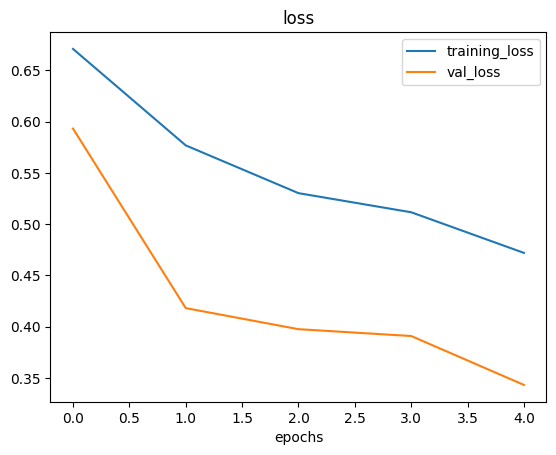

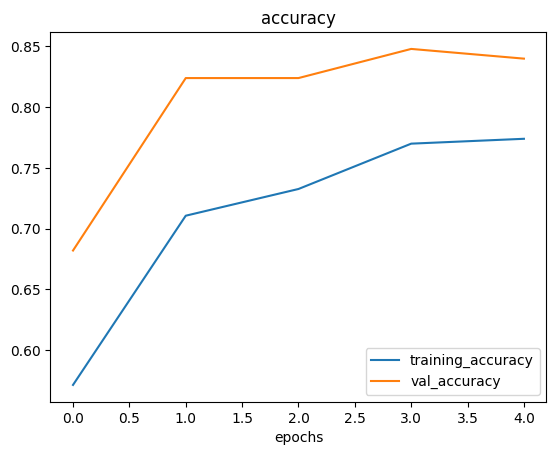

In [68]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D/MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [69]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-12-28 06:30:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  11.0MB/s    in 0.2s    

2024-12-28 06:30:47 (11.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



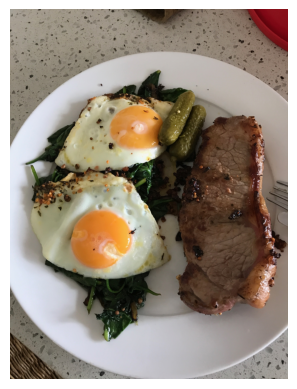

In [70]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [71]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [73]:
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [74]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(file_name, img_shape=224):
      """
      Reads an image from filename, turns it into a tensor and reshapes it 
      to (img_shape, img_shape, colour_channels).
      """
      # Read in the image
      img = tf.io.read_file(filename=file_name)
      # Decode the read file into a tensor
      img = tf.image.decode_image(img)
      # Resize the image
      img = tf.image.resize(img, size=[img_shape, img_shape])
      # Rescale the image (get all values between 0 and 1)
      img = img / 255.
      return img

In [81]:
# Load in and preprocess our custom image
reshaped_image = load_and_prep_image("03-steak.jpeg")

In [89]:
pred = model_7.predict(tf.expand_dims(reshaped_image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.89454323]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [86]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [90]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [91]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(file_name=filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class  
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


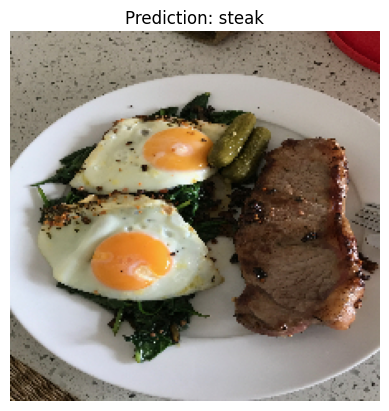

In [92]:
# Test our model on a custom image
pred_and_plot(model=model_7, filename="03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

--2024-12-28 12:19:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  11.5MB/s    in 0.2s    

2024-12-28 12:19:34 (11.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


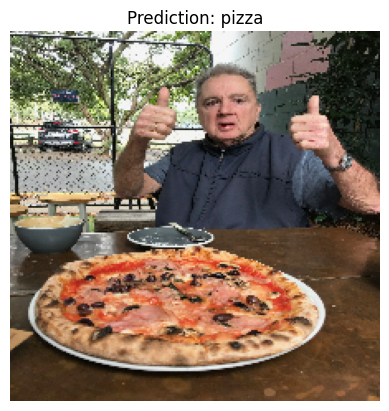

In [93]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [94]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-12-28 12:28:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.221.91, 142.250.66.251, 142.250.66.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.221.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  12.5MB/s    in 40s     

2024-12-28 12:29:21 (12.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [95]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [96]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [97]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1400868.jpg']
Image shape: (384, 512, 3)


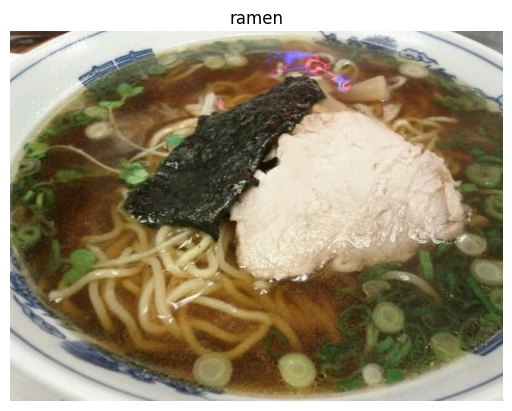

In [102]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [107]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.1658 - loss: 2.2270 - val_accuracy: 0.3028 - val_loss: 1.9475
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.3431 - loss: 1.8933 - val_accuracy: 0.3352 - val_loss: 1.8894
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.4786 - loss: 1.5575 - val_accuracy: 0.3568 - val_loss: 1.9190
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.7014 - loss: 0.9444 - val_accuracy: 0.3172 - val_loss: 2.3560
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.8814 - loss: 0.4124 - val_accuracy: 0.2808 - val_loss: 3.5101


### 5. Evaulate the model

In [112]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2834 - loss: 3.5238


[3.5101237297058105, 0.2808000147342682]

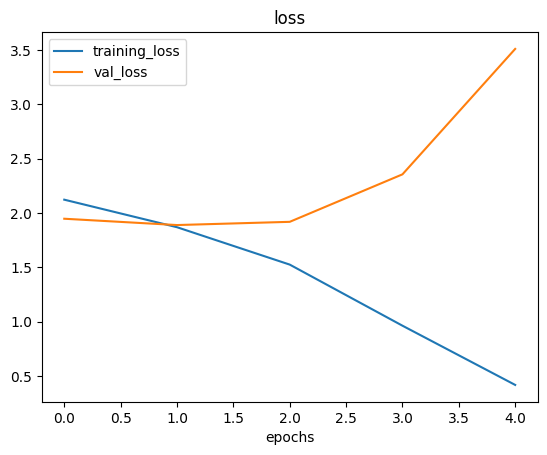

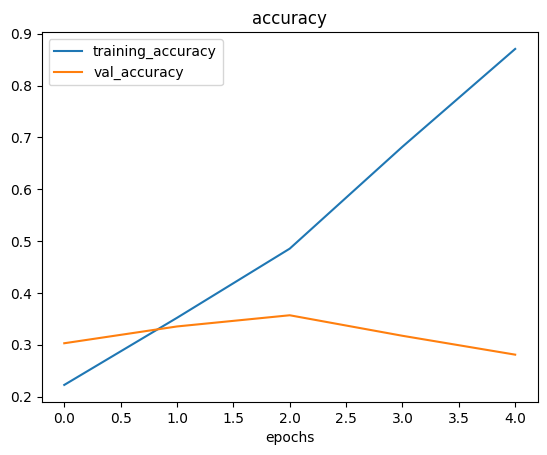

In [113]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.